# Détection de Fraude Bancaire Basée sur des Algorithmes de Machine Learning : Approche Multimodèle et Optimisation des Données Déséquilibrées

La fraude par carte bancaire constitue l'un des défis majeurs dans le domaine des paiements électroniques et de la sécurité financière. Avec l'essor des transactions en ligne et la numérisation croissante des systèmes financiers, les criminels développent constamment de nouvelles méthodes pour exploiter les vulnérabilités des systèmes de paiement. Ces fraudes peuvent prendre de nombreuses formes, notamment :  
- Utilisation non autorisée de cartes volées : Les fraudeurs utilisent les informations d'une carte volée pour effectuer des achats ou retirer de l'argent.  
- Hameçonnage (phishing) : Obtenir des informations de carte bancaire par des méthodes frauduleuses, comme des e-mails ou des sites web trompeurs.  
- Clonage de cartes : Copie des données de la bande magnétique ou de la puce pour créer une carte frauduleuse.  
- Fraudes en ligne : Les criminels exploitent les transactions sans carte physique (e-commerce), où seules les informations de la carte sont requises.  
### Défis dans la détection des fraudes

La détection des fraudes est rendue complexe par plusieurs facteurs :  
- Déséquilibre des classes : Les fraudes représentent une proportion infime des transactions (souvent moins de 1 %), ce qui complique la tâche des algorithmes.
- Nécessité d'une réponse rapide : Les fraudes doivent être détectées en temps réel ou quasi-réel pour limiter les pertes.
### Rôle des technologies avancées

L'apprentissage automatique (machine learning) et l'intelligence artificielle (IA) jouent un rôle clé dans la détection des fraudes par carte bancaire. Ces technologies permettent de :
- Analyser rapidement un grand volume de données transactionnelles.
- Identifier des schémas ou comportements atypiques associés aux fraudes.
- Améliorer les taux de détection tout en minimisant les faux positifs, pour éviter de bloquer des transactions légitimes.  

Grâce à ces avancées, les institutions financières sont mieux équipées pour protéger leurs clients contre les menaces croissantes de fraude par carte bancaire. Cependant, une collaboration constante entre experts en sécurité, chercheurs en IA, et acteurs financiers est nécessaire pour rester en avance sur les fraudeurs.

## 1- Importer librairies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2- Retrive data

In [ ]:
client_data = pd.read_csv('/content/creditcard_kaggle.csv')

In [ ]:
client_data.shape

(25838, 31)

In [ ]:
# show the first five rows of the data
client_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## 3- Exploratory Data Analysis

In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

toutes les colonnes sont numerique , donc c'est bon

Certaines colonnes ont des valeurs manquantes (V3,...V28, Amount, Class) avec une seule ligne affectée. Il faudra les traiter (par suppression ou imputation).
=> L'imputation consiste à remplacer les valeurs manquantes par des valeurs calculées ou estimées.

In [ ]:
# Identifier les lignes avec des valeurs manquantes
missing_data = client_data[client_data.isnull().any(axis=1)]
missing_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25837,33787,1.303469,0.49845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


une seule ligne avec valeur manquante, alors la suppression est une solution simple et rapide.

In [ ]:
# Supprimer les lignes avec des valeurs manquantes
client_data = client_data.dropna()
print(f"Lignes après suppression : {client_data.shape[0]}")

Lignes après suppression : 25837


In [ ]:
client_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19375.570771,-0.225712,0.166964,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.780077,1.889067,1.552825,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.000000,-0.951371,-0.405182,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22682.000000,-0.268134,0.176391,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30230.000000,1.166445,0.818213,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


### Traitement des Outliers

#### *Detection*

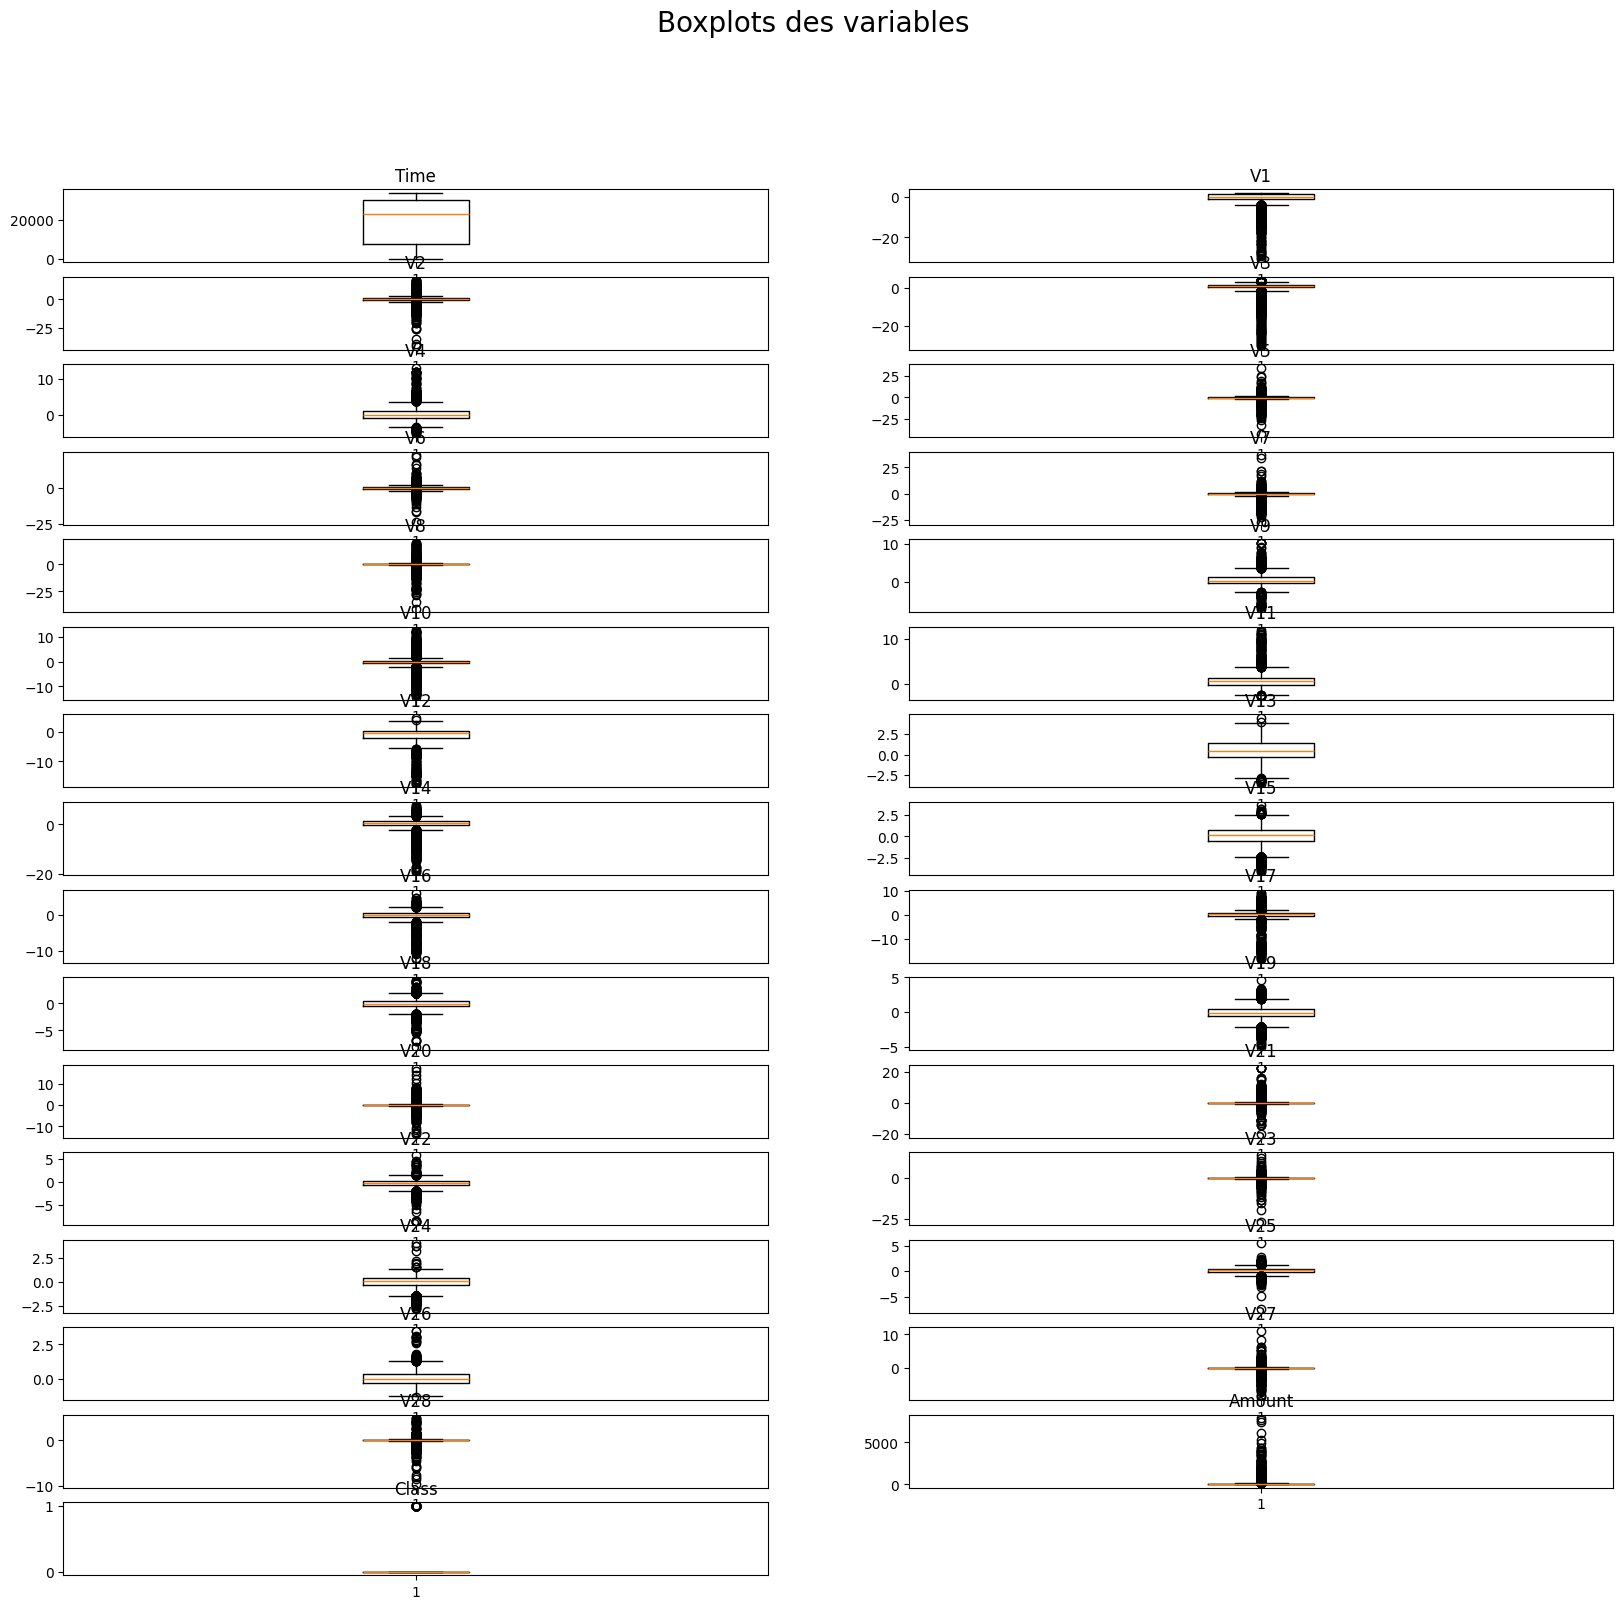

In [ ]:
numeric_cols = client_data.select_dtypes(include=['float64', 'int64'])
num_cols = len(numeric_cols.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(20, 18))
plt.suptitle('Boxplots des variables', fontsize=20)
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(numeric_cols[col])
    plt.title(col)

#### *Imputation des outliers*

De nombreuses variables présentent des valeurs aberrantes (points en dehors des whiskers). Ces valeurs pourraient potentiellement affecter les analyses statistiques ou les modèles prédictifs.

Pour remplacer les valeurs aberrantes (outliers) par la médiane dans un DataFrame, nous devons d'abord définir ce qu'on considère comme un outlier. Une méthode courante consiste à utiliser l'intervalle interquartile (IQR) pour identifier ces valeurs. Les valeurs considérées comme des outliers sont celles qui se trouvent en dehors de l'intervalle :  
IQR = 𝑄3−𝑄1  
Q1 : premier quartile (25ème percentile)  
Q3 : troisième quartile (75ème percentile)  
Seuils des outliers :  
borne inferieure = 𝑄1−1.5×IQR  
borne inferieure = Q1−1.5×IQR  
Les valeurs en dehors de ces bornes seront considérées comme des outliers et remplacées par la médiane.

In [ ]:
import pandas as pd

# Fonction pour remplacer les outliers par la médiane
def replace_outliers_with_median(series):
    # Calcul des quantiles et de l'IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    # Calcul des bornes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calcul de la médiane
    median = series.median()
    # Remplacer les outliers par la médiane
    series_cleaned = series.copy()
    series_cleaned[series_cleaned < lower_bound] = median
    series_cleaned[series_cleaned > upper_bound] = median

    return series_cleaned

# Application de la fonction à toutes les colonnes sauf la dernière (si c'est la cible)
client_imputed = client_data.iloc[:, :-1].apply(replace_outliers_with_median, axis=0)
# ajouter la derniere colonne
client_imputed[client_data.columns[-1]] = client_data[client_data.columns[-1]]
client_data = client_imputed

In [ ]:
client_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,-0.049040,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,18.96,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.019985,69.99,0.0


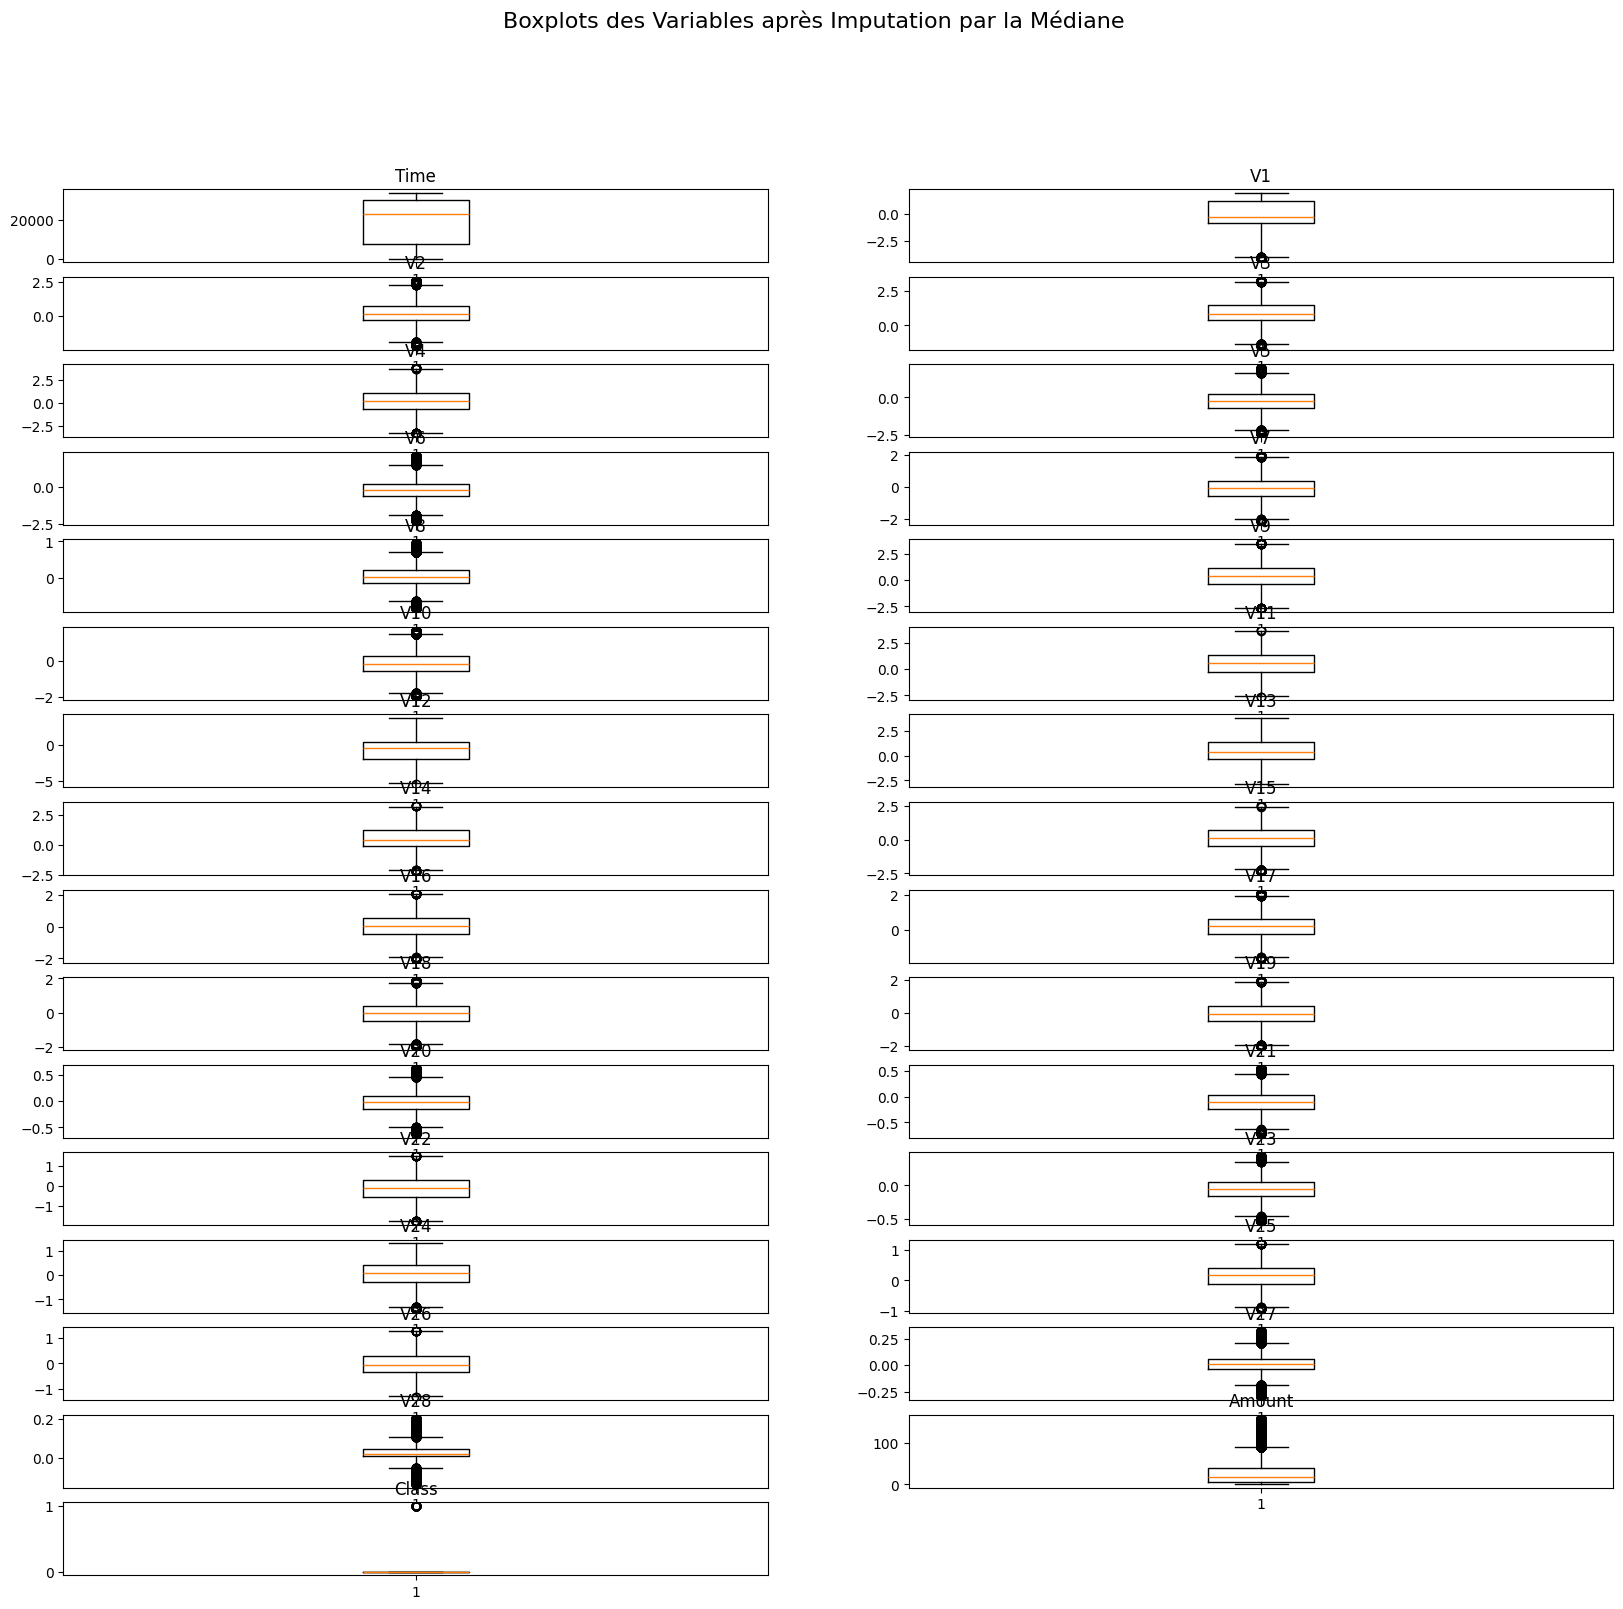

In [ ]:
numeric_cols = client_data.select_dtypes(include=['float64', 'int64'])
num_cols = len(numeric_cols.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(20, 18))
plt.suptitle('Boxplots des Variables après Imputation par la Médiane', fontsize=16)
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(numeric_cols[col])
    plt.title(col)

Maintenant que le jeu de données est préparé, on est prêt à entamer l'analyse.

### Vérification des corrélations entre les variables

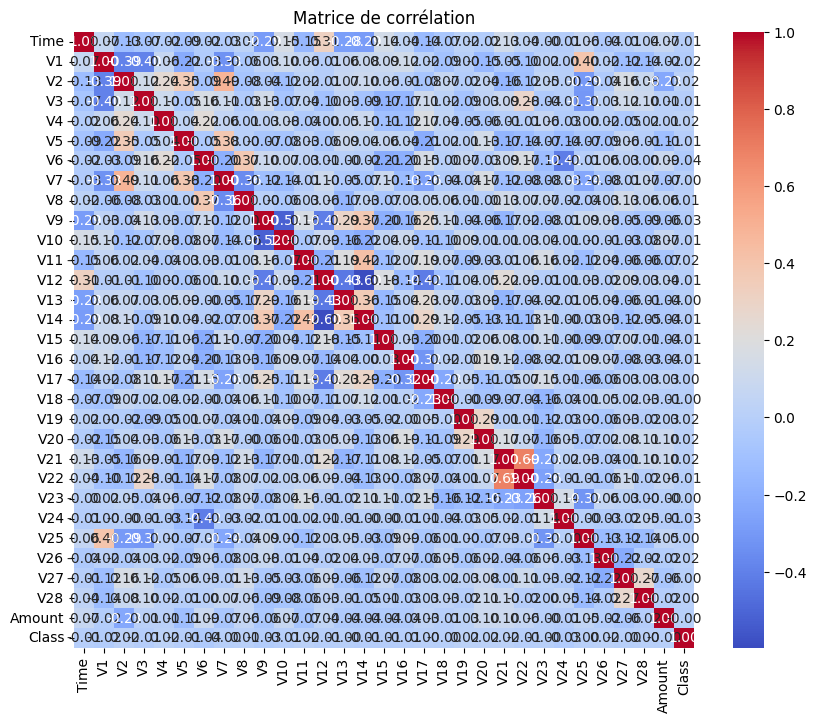

In [ ]:
corr_matrix = client_data.corr()

# Visualisation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
# Extraire les paires fortement corrélées
threshold = 0.8
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Filtrer les corrélations fortes (en évitant la diagonale)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
print(high_corr_pairs)


Series([], dtype: float64)


il n'y a aucune paire de variables ayant une corrélation correspondant au critère(supérieure à 0.8 ou inférieure à -0.8).

<Axes: xlabel='Class', ylabel='count'>

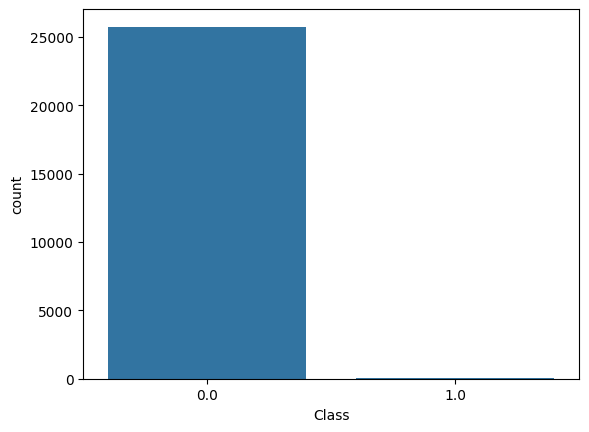

In [ ]:
sns.countplot(x='Class', data=client_data)

there is a huge diffrerence between the class "0" (no fraud) and "1" ===> unbalanced database, so the accuracy metric for evaluation is unsufficient

## 4- Preparing the data into train and test


Let's start by splitting our data into a training set and test set.


In [ ]:
X = client_data.drop(columns='Class', axis=1) # all columns except "Class" one
y = client_data.Class.values

In [ ]:
#separate dataset to trainbase and testbase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 33% for test

### Regulate the unbanlance between the 2 classes :

we apply just for train (not test !!!).(
pour éviter un data leakage ou fuite de données)

### Equilibrer les classes avec over-sampling

L'over-sampling augmente la taille de la classe minoritaire en dupliquant ou en synthétisant de nouvelles instances, tout en laissant intactes les données de la classe majoritaire.  


Aproche SMOTE (Synthetic Minority Over-sampling Technique) : c'est une technique qui consiste à suréchantillonner la classe minoritaire en générant des exemples synthétiques plutôt que de simplement répliquer les exemples existants. Ceci fonctionne en trois étapes:  
-  Sélection des voisins les plus proches : Pour chaque exemple de la classe minoritaire, SMOTE trouve ses k voisins les plus proches dans l'espace des features. Ces voisins peuvent être trouvés en utilisant une mesure de distance, comme la distance euclidienne.  
- Génération d'exemples synthétiques : Pour chaque exemple de la classe minoritaire, SMOTE sélectionne aléatoirement un ou plusieurs de ses voisins les plus proches et utilise une *combinaison linéaire* de ces exemples pour générer un nouvel exemple synthétique. Cela crée un nouvel exemple dans l'espace des features qui se situe le long de la ligne reliant l'exemple original et ses voisins.
- Expansion de la classe minoritaire : En répétant ce processus pour chaque exemple de la classe minoritaire, SMOTE génère un ensemble de nouveaux exemples synthétiques qui sont ajoutés à la classe minoritaire. Cela permet d'augmenter la taille de la classe minoritaire tout en évitant le surapprentissage dû à une simple réplication des exemples existants.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
print("Taille de X_train_balanced :", X_train_balanced.shape)
print("Taille de y_train_balanced :", y_train_balanced.shape)

Taille de X_train_balanced : (36050, 30)
Taille de y_train_balanced : (36050,)


In [ ]:
import pandas as pd
y_train_balanced_series = pd.Series(y_train_balanced)
print(y_train_balanced_series.value_counts())

0.0    18025
1.0    18025
Name: count, dtype: int64


Now the two classes are balanced, let's build our logistique regression model

## 5- Build a Logistic Regression model for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

##  6- Train the model

In [ ]:
lr.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
print(lr.coef_)
print(lr.intercept_)  # theta0

[[-6.16903815e-05 -5.18193751e-01  1.65889061e-01 -1.39022172e+00
   6.97382419e-01 -9.54224543e-02 -1.65103641e+00 -8.90554588e-01
   6.91222102e-02 -1.16010148e+00 -3.67684508e-01  8.05435956e-01
  -5.59829352e-01  1.03015678e-01 -1.32147279e+00 -9.56817916e-01
  -5.55099457e-01 -2.12929986e-01 -9.89920594e-02  1.44504915e+00
   3.10092032e-01  4.41027160e-01 -6.27517523e-01 -3.67207537e-02
  -1.32750785e+00  2.01388358e-01  6.81678025e-01 -2.90060071e-02
  -2.24237854e-02  1.80613197e-02]]
[-0.42824964]


## 7- Evaluation

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
y_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_predict)*100
print('Testing accuracy: ', test_accuracy)

Testing accuracy:  81.66924664602682


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict))

Confusion matrix:
 [[6307 1417]
 [   4   24]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print(tn,fp,fn,tp)

6307 1417 4 24


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, digits=6))

              precision    recall  f1-score   support

         0.0   0.999366  0.816546  0.898753      7724
         1.0   0.016655  0.857143  0.032675        28

    accuracy                       0.816692      7752
   macro avg   0.508011  0.836844  0.465714      7752
weighted avg   0.995817  0.816692  0.895625      7752




1. **Classe 0 (majoritaire) :**
   - **Précision (precision)** : **99.94%** — Le modèle identifie correctement la classe 0 dans presque tous les cas où il la prédit.
   - **Rappel (recall)** : **81.65%** — Le modèle capture 81.65% des instances réelles de la classe 0.
   - **F1-Score** : **89.87%** — Un bon équilibre entre précision et rappel pour cette classe.
   - **Support** : **7,724** — La classe 0 est bien représentée dans les données.

2. **Classe 1 (minoritaire) :**
   - **Précision (precision)** : **1.67%** — Le modèle est peu précis pour prédire la classe 1 (beaucoup de faux positifs).
   - **Rappel (recall)** : **85.71%** — Le modèle détecte la majorité des cas réels de la classe 1.
   - **F1-Score** : **3.27%** — La faible précision fait chuter la moyenne harmonique.
   - **Support** : **28** — La classe 1 est très peu représentée, ce qui reflète un déséquilibre des données.

3. **Global :**
   - **Exactitude (accuracy)** : **81.67%** — Une grande majorité des prédictions totales du modèle sont correctes.
   - **Macro Moyenne (macro avg)** :
     - Précision moyenne : **50.80%** — Moyen, car le modèle est très précis pour la classe majoritaire, mais pas pour la minoritaire.
     - Rappel moyen : **83.68%** — Bon score, dû à la couverture des deux classes.
     - F1-Score moyen : **46.57%** — Moyen, affecté par la classe minoritaire.
   - **Moyenne pondérée (weighted avg)** :
     - Pondère les métriques en fonction du support de chaque classe. La classe 0 (majoritaire) domine, ce qui explique les bons scores pondérés pour précision (**99.58%**) et F1-score (**89.56%**).

**Interprétation :**
- Le modèle est très performant pour la classe majoritaire (classe 0), mais souffre de faibles performances pour la classe minoritaire (classe 1), notamment en termes de précision.
- L'important déséquilibre des classes (7,724 vs 28) explique cette différence de performance.
- Bien que le rappel pour la classe 1 soit élevé (**85.71%**), la précision très faible (**1.67%**) montre que le modèle génère de nombreux faux positifs.


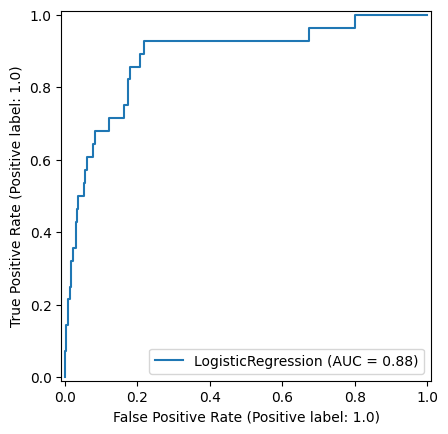

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC curve
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

auc=0.90 ,it is good ( the ideal is to have 1)

In [ ]:
#probability that x can be on class 1
y_test_predict_probs = lr.predict_proba(X_test)[:,1]
y_test_predict_probs

array([0.93493536, 0.16004117, 0.02366754, ..., 0.12838451, 0.00136488,
       0.75216125])

## Other models

### 1- K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: ', test_accuracy)

Testing accuracy:  88.40299277605779


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[6836  888]
 [  11   17]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn,fp,fn,tp)

6836 888 11 17


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

         0.0   0.998393  0.885034  0.938302      7724
         1.0   0.018785  0.607143  0.036442        28

    accuracy                       0.884030      7752
   macro avg   0.508589  0.746088  0.487372      7752
weighted avg   0.994855  0.884030  0.935045      7752



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

#### ROC-AUC Score
ROC-AUC (Receiver Operating Characteristic - Area Under Curve) : C'est une métrique qui évalue la capacité du modèle à distinguer entre les classes positives (1) et négatives (0).  
Le score ROC-AUC varie entre 0 et 1 :  
- 1 : Le modèle est parfait (il distingue parfaitement entre les classes).  
- 0.5 : Le modèle ne fait pas mieux qu'une prédiction aléatoire.  
- < 0.5 : Le modèle fait pire qu'une prédiction aléatoire.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7537614670415033


Un ROC-AUC de 0.75 montre que le modèle distingue assez bien entre les classes, mais il y a encore place à amélioration.

#### Precision-Recall Curve
La courbe indique la variation de la précision en fonction du rappel pour différents seuils de probabilité.

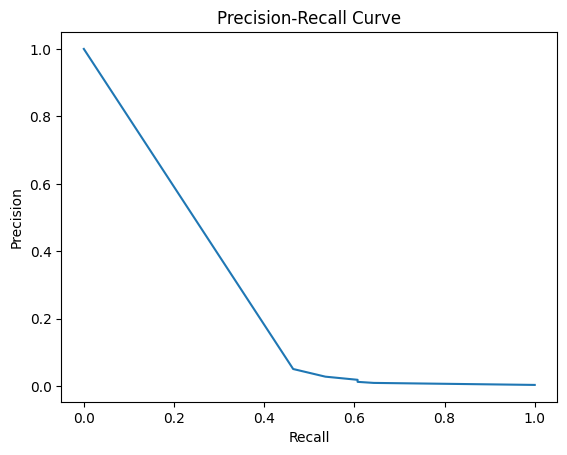

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


la précision diminue rapidement avec une augmentation du rappel, cela montre que le model modèle a du mal à maintenir une précision élevée tout en capturant tous les exemples positifs.

### 2- Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
 Ces algorithmes sont souvent très performants sur des données tabulaires, même avec un déséquilibre des classes.

#### 2.1- XGBoost :

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]), random_state=42)
xgb.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Testing accuracy:  99.88390092879257
tn :  7717 fp : 7 fn : 2 tp : 26
########################################
              precision    recall  f1-score   support

         0.0   0.999741  0.999094  0.999417      7724
         1.0   0.787879  0.928571  0.852459        28

    accuracy                       0.998839      7752
   macro avg   0.893810  0.963833  0.925938      7752
weighted avg   0.998976  0.998839  0.998886      7752

ROC-AUC: 0.7537614670415033


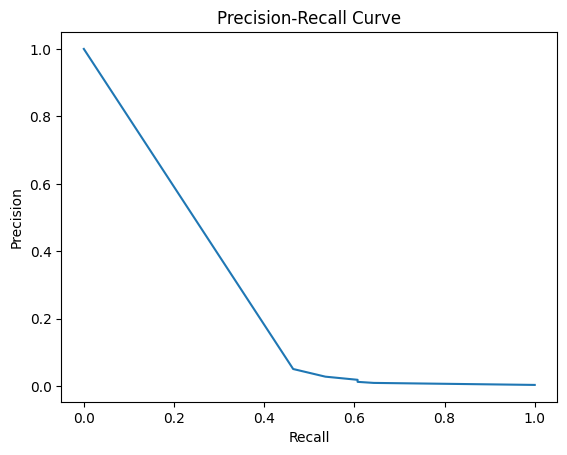

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: ', test_accuracy)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn : ", tn,"fp :", fp,"fn :", fn,"tp :", tp)
print("########################################")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### 2.2- LightGBM :

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train_balanced, y_train_balanced)

[LightGBM] [Info] Number of positive: 18025, number of negative: 18025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 36050, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = lgbm.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Testing accuracy:  99.79360165118679
tn :  7716 fp : 8 fn : 8 tp : 20
########################################
              precision    recall  f1-score   support

         0.0   0.998964  0.998964  0.998964      7724
         1.0   0.714286  0.714286  0.714286        28

    accuracy                       0.997936      7752
   macro avg   0.856625  0.856625  0.856625      7752
weighted avg   0.997936  0.997936  0.997936      7752

ROC-AUC: 0.7537614670415033


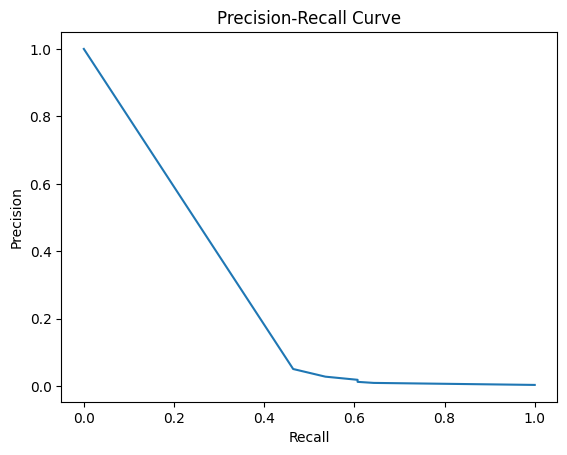

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: ', test_accuracy)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn : ", tn,"fp :", fp,"fn :", fn,"tp :", tp)
print("########################################")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### 2.3- CatBoost :

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)
catboost.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_pred = catboost.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Testing accuracy:  99.78070175438597
tn :  7709 fp : 15 fn : 2 tp : 26
########################################
              precision    recall  f1-score   support

         0.0   0.999741  0.998058  0.998899      7724
         1.0   0.634146  0.928571  0.753623        28

    accuracy                       0.997807      7752
   macro avg   0.816943  0.963315  0.876261      7752
weighted avg   0.998420  0.997807  0.998013      7752

ROC-AUC: 0.7537614670415033


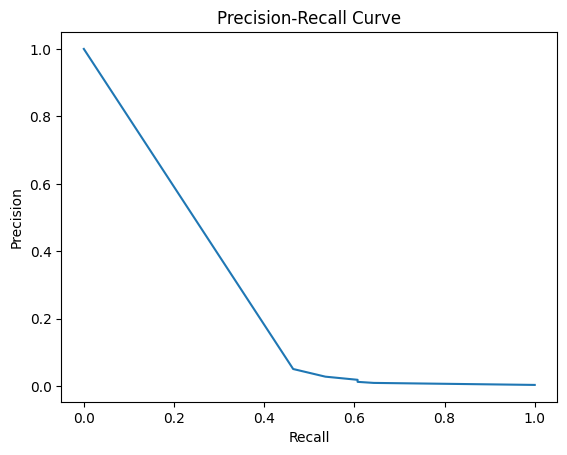

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: ', test_accuracy)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn : ", tn,"fp :", fp,"fn :", fn,"tp :", tp)
print("########################################")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### 3-  Random Forest

Utilise des arbres de décision pour obtenir des résultats robustes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Testing accuracy:  99.81940144478844
7722 2 12 16
########################################
              precision    recall  f1-score   support

         0.0   0.998448  0.999741  0.999094      7724
         1.0   0.888889  0.571429  0.695652        28

    accuracy                       0.998194      7752
   macro avg   0.943669  0.785585  0.847373      7752
weighted avg   0.998053  0.998194  0.997998      7752

ROC-AUC: 0.7537614670415033


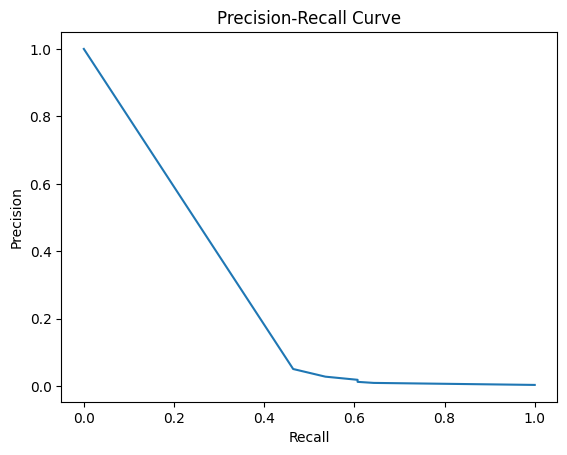

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: ', test_accuracy)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn,fp,fn,tp)
print("########################################")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Comparaison Globale des Modèles :

1. **Régression Logistique** :  
   - Très faible performance sur la classe minoritaire (1.0) avec une précision de 1.67% et un F1-score de 3.27%.  
   - Bien que l'accuracy soit de 81.66%, elle est trompeuse à cause du déséquilibre des classes.

2. **KNN** :  
   - Meilleure couverture de la classe minoritaire que la régression logistique, mais toujours insuffisante avec un F1-score de 3.64%.  
   - Accuracy relativement élevée (88.4%), mais le modèle souffre de la même problématique de déséquilibre.

3. **XGBoost** :  
   - Excellente performance globale, avec un F1-score de 85.25% pour la classe minoritaire.  
   - Très bon compromis entre précision et rappel pour les deux classes, avec une accuracy de 99.88%.  

4. **LightGBM** :  
   - Performances légèrement inférieures à XGBoost, avec un F1-score de 71.43% pour la classe minoritaire.  
   - Accuracy élevée (99.79%), mais rappel plus faible sur la classe minoritaire.

5. **CatBoost** :  
   - Bon rappel pour la classe minoritaire (92.86%) et un F1-score de 75.36%.  
   - Performances proches de celles de XGBoost mais légèrement inférieures en précision.  

6. **Random Forest** :  
   - Meilleur compromis entre précision (88.89%) et rappel (57.14%) pour la classe minoritaire, mais F1-score de 69.56%.  
   - Accuracy élevée (99.81%), mais inférieur à XGBoost.

---

### Conclusion :
Parmi les modèles évalués, **XGBoost** est le plus performant pour ce problème de détection de fraude. Il montre une excellente capacité à détecter la classe minoritaire (1.0) tout en maintenant une précision globale élevée. Les autres modèles, bien qu'efficaces dans la détection de la classe majoritaire, n'atteignent pas le même niveau de performance pour la classe minoritaire, ce qui est critique dans ce contexte.

